<table> <tr>
        <td  style="background-color:#ffffff;">
            <a href="https://qworld.net" target="_blank"><img src="../images/qworld.jpg" width="25%" align="left"> </a></td>
        <td style="background-color:#ffffff;vertical-align:bottom;text-align:right;">
            prepared by Berat Yenilen, Utku Birkan and Özlem Salehi (<a href="https://qworld.net/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<h1> Implementing Classical Gates Using Quantum Circuits </h1>

In classical circuits, we use gates like $AND$, $OR$ and $NOT$. A gate set is universal if one can implement any boolean function $ f:\{0,1\}^n \rightarrow \{0,1\} $, using the gate set. An example universal set would be using $AND$, $OR$ and $NOT$ gates. 


- A $NOT$ gate takes one input $x_1 \in \{0,1\}$ and returns the negation of $x_1$.

- An $AND$ gate takes two inputs $x_1,x_2 \in \{0,1\}$ and returns 1 if and only if both $x_1$ and $x_2$ are equal to 1, 0 otherwise. 

- An $OR$ gate takes two inputs $x_1, x_2 \in \{0, 1 \}$ and returns 1 if $x_1 = 1$ and/or $x_2 =1$.



$NOT: \begin{array}{c|c} \mathbf{In} & \mathbf{Out} \\ \hline  0 & 1 \\ 1 & 0  \end{array} ~~~~~~~~ AND: \begin{array}{cc|c} \mathbf{In} & \mathbf{In} & \mathbf{Out} \\ \hline 0 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \\1 & 1 & 1      \end{array} ~~~~~~~~ OR: \begin{array}{cc|c} \mathbf{In} & \mathbf{In} & \mathbf{Out} \\ \hline 0 & 0 & 0 \\ 0 & 1 & 1 \\ 1 & 0 & 1 \\1 & 1 & 1      \end{array}$

<h3> Task 1 (Discuss) </h3> 

How can we implement $AND$ and $OR$ gates by a quantum circuit?

## Reversible Computing

By looking at the output column of the tables of the $AND$ and $OR$ gates, we can not guess what the input is. We can say that the information or the entropy is lost by applying those gates and those operations are called **irreversible**. Irreversible copmutation dissipates heat to the environment. 

On the other hand, this is not the case for the $NOT$ gate as the input can be constructed by looking at the output. Such gates are called reversible and a computation which consists of only reversible operations is called a **reversible computation**. 

A set of gates is called **universal** if it is possible to implement any other gate using the gates in the set. Theoretically, it is possible to build a universal computer which only uses reversible gates. For instance, $AND$ and $NOT$ gates or the Toffoli gate ($CCNOT$) itself are universal sets of gates for classical computing. (Note that since $CCNOT$ is also a quantum gate, we conclude that any classical operation can be simulated by a quantum computer.)

Since quantum computing is reversible according to the laws of physics, $AND$ and $OR$ gates should be implemented in a reversible way as well. The idea is to create a 3-qubit circuit, which does not modify the input bits and writes the output to the third bit. When the output bit is set to 0, then you exactly get the same output.

<img src="../images/fcircuit.png" width="50%" align="center">

<h3> Task 2 </h3> 

Complete the following table that corresponds to reversible $AND$ gate, where $\ket{x_1}$ and $\ket{x_2}$ are the inputs of the $AND$ gate and the $\ket{y} =0$ is the output. Which three-qubit quantum gate can we use to implement the $AND$ operator in a reversible manner? 

$
AND: \begin{array}{ccc|ccc} 
    \mathbf{In}  &             &            &\mathbf{Out} &             &          \\
    \hline \mathbf{x_1} & \mathbf{x_2}& \mathbf{y} & \mathbf{x_1}& \mathbf{x_2}& \mathbf{y \oplus (x_1 \wedge x_2)} \\ 
    \hline 0 & 0 & 0 &  &  &  \\ 
    \hline 0 & 1 & 0 &  &  &  \\ 
    \hline 1 & 0 & 0 &  &  &  \\
    \hline 1 & 1 & 0 &  &  &  \\ 
    \end{array}
    $

$
AND: \begin{array}{ccc|ccc} 
    \mathbf{In}  &             &            &\mathbf{Out} &             &          \\
    \hline \mathbf{In} & \mathbf{In}& \mathbf{In} & \mathbf{Out}& \mathbf{Out}& \mathbf{Out} \\ 
    \hline 0 & 0 & 0 & 0 & 0 & 0 \\ 
    \hline 0 & 1 & 0 & 0 & 1 & 0 \\ 
    \hline 1 & 0 & 0 & 1 & 0 & 0 \\
    \hline 1 & 1 & 0 & 1 & 1 & 1 \\ 
    \end{array}
    $
    
We can use CCNOT (Toffoli) gate.

<h3> Task 3 </h3> 

Design a quantum (reversible) circuit for implementing $OR$ gate. Test your circuit on all possible two bit inputs. Measure only the output qubit.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator

for input in ['00','01','10','11']:
    
    mycircuit1 = QuantumCircuit(3,1)
    
    #Initialization - Note qiskit order
    if input[0] == '1':
        mycircuit1.x(1)
    if input[1] == '1':
        mycircuit1.x(0)

    mycircuit1.cx(0,2)
    mycircuit1.cx(1,2)
    mycircuit1.ccx(0,1,2)

    mycircuit1.measure(2,0)
    job = AerSimulator().run(mycircuit1,shots=1000)
    counts = job.result().get_counts()
    print("Input:", input, "Output:", counts)

Input: 00 Output: {'0': 1000}
Input: 01 Output: {'1': 1000}
Input: 10 Output: {'1': 1000}
Input: 11 Output: {'1': 1000}


<h3>Task 4 </h3>

Fredkin gate is a three qubit controlled swap gate which swaps the second and third qubits if the first qubit is in state $ \ket{1} $. It is represented with the following matrix. 

<img src="../images/fredkin.png" width="20%" align="center">

Create a method named `fredkin` and implement Fredkin gate using $CNOT$ and $CCNOT$ operators. Use unitary simulator to check the unitary matrix corresponding to your circuit. (Follow the Qiskit order.)

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import UnitarySimulator

def fredkin(): # Applies fredkin gate to the input using CX and CCX gates.    
    circuit = QuantumCircuit(3)
    circuit.cx(0,1)
    circuit.ccx(2,1,0)
    circuit.cx(0,1)
    return circuit

[[1.  0.  0.  0.  0.  0.  0.  0.]
 [0.  1.  0.  0.  0.  0.  0.  0.]
 [0.  0.  1.  0.  0.  0.  0.  0.]
 [0.  0.  0.  1.  0.  0.  0.  0.]
 [0.  0.  0.  0.  1.  0.  0.  0.]
 [0.  0.  0.  0.  0.  0.  1.  0.]
 [0.  0.  0.  0.  0.  1.  0.  0.]
 [0.  0.  0.  0.  0.  0.  0.  1.]]


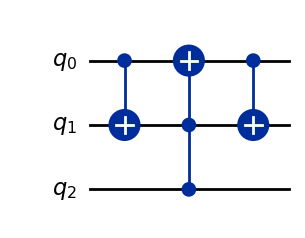

In [3]:
import numpy as np

circuit = fredkin()

job = UnitarySimulator().run(circuit)
u = job.result().get_unitary(decimals=3).data

print(np.array2string(u.real, precision=1, separator='  '))
circuit.draw(output="mpl")

<h2> Implementing any Boolean Function </h2> 

Now having seen that we can implement a set of universal gates on a quantum computer, provided that we make them "reversible", we can say that it is possible to implement any boolean function $f:\{0,1\}^n \rightarrow \{0,1\}$. So given any boolean function $f(x)$, we propose that the following circuit will implement it in a quantum computer.

<img src="../images/foperator.png" width="30%" align="center">

Here $U_f$, the corresponding quantum operator, is defined as follows:

$$U_f: \ket{x}\ket{y} \mapsto \ket{x}\ket{y \oplus f(x)} $$

The symbol $\oplus$ denotes bitwise addition modulo 2 (XOR). This mapping is reversible although $f$ might not be invertible.

<h3> Task 5</h3>

Prove that $U_f$ is reversible, by showing that given $x$ and $y \oplus f(x)$, $y$ can be computed.

_Hint: Use the fact that $x \oplus x = 0$ for any bit x and $\oplus$ operation is associative._

<h3> Solution </h3>

$(y \oplus f(x)) \oplus f(x) = y \oplus (f(x) \oplus f(x)) = y \oplus 0 = y.$

The first equality follows by associativity and the second equality follows by the property of XOR operation.

<h3> Task 6</h3>

After applying the operator $U_f$, what is the new state of the output qubit $\ket{y}$ in terms of $f(x)$ if initially:

- $\ket{y} = \ket{0}$

- $\ket{y} = \ket{1}$

- $\ket{y} = \ket{-}$

<h3> Solution </h3>

- If $\ket{y}$ is $\ket{0}$, output is $ f(x)$

- If $\ket{y}$  is $\ket{1}$, output is negation of $f(x)$

- If $\ket{y}$  is $\ket{-}$, check the next notebook.